In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K



In [120]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [121]:
import numpy as np
from keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Initialize variables to store filtered data
x_train_filtered = []
y_train_filtered = []

# Define the target number of examples per class
examples_per_class = 3000

# Count occurrences of each label in the training set
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# Iterate over each unique label
for label, count in zip(unique_labels, label_counts):
    # Find indices of examples with the current label
    indices = np.where(y_train == label)[0]
    # Randomly select min(examples_per_class, count) indices
    selected_indices = np.random.choice(indices, min(examples_per_class, count), replace=False)
    # Append the corresponding examples and labels to filtered lists
    x_train_filtered.extend(x_train[selected_indices])
    y_train_filtered.extend(y_train[selected_indices])

# Convert filtered lists to NumPy arrays
x_train_filtered = np.array(x_train_filtered)
y_train_filtered = np.array(y_train_filtered)

# Shuffle the data
permutation = np.random.permutation(len(x_train_filtered))
x_train_filtered = x_train_filtered[permutation]
y_train_filtered = y_train_filtered[permutation]

# Print the shape of the filtered data
print("Filtered Training Data Shape:", x_train_filtered.shape)
print("Filtered Training Labels Shape:", y_train_filtered.shape)

# Count occurrences of each label in the filtered training set
unique_labels_filtered, label_counts_filtered = np.unique(y_train_filtered, return_counts=True)
print("Filtered Train labels: ", dict(zip(unique_labels_filtered, label_counts_filtered)))


Filtered Training Data Shape: (30000, 28, 28)
Filtered Training Labels Shape: (30000,)
Filtered Train labels:  {0: 3000, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 5: 3000, 6: 3000, 7: 3000, 8: 3000, 9: 3000}


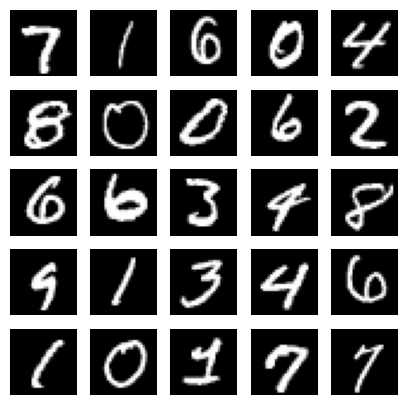

In [122]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [123]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [124]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [125]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [126]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [127]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [128]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [129]:
from keras.initializers import Zeros
from keras.initializers import HeNormal

initializer = HeNormal()

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_initializer=initializer))
model.add(Activation('relu'))

model.add(Dense(hidden_units, kernel_initializer=initializer))
model.add(Activation('relu'))

model.add(Dense(num_labels, kernel_initializer=initializer))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [130]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 activation_18 (Activation)  (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 activation_19 (Activation)  (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
 activation_20 (Activation)  (None, 10)                0         
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 26932

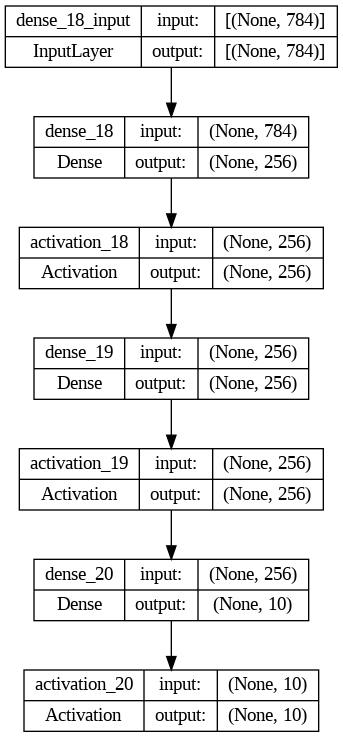

In [131]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [132]:
from keras.optimizers import SGD

lr = 0.01
sgd = SGD(learning_rate=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [133]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.0311 - accuracy: 0.7509
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4294 - accuracy: 0.8845
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3466 - accuracy: 0.9038
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3064 - accuracy: 0.9147
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2797 - accuracy: 0.9215
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2594 - accuracy: 0.9272
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2428 - accuracy: 0.9317
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2288 - accuracy: 0.9358
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2168 - accuracy: 0.9395
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2062 - accuracy: 0.942

In [134]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 6ms/step - loss: 0.1433 - accuracy: 0.9575

Test accuracy: 95.7%
